In [ ]:
# Install dependencies
!pip install -U torch torchvision
!pip install opencv-python

# Install Detectron2
# Install the pre-built version specific to the current PyTorch version:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Verify installation by importing Detectron2
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Check if it was installed correctly
import torch, torchvision
print(f"Torch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

# Test a simple import from Detectron2 and OpenCV
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
import cv2
print("Detectron2 and OpenCV are ready to use!")


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-w3waowo8
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-w3waowo8
  Resolved https://github.com/facebookresearch/detectron2.git to commit 8d85329aed8506ea3672e3e208971345973ea761
  Preparing metadata (setup.py) ... done
Torch version: 2.4.1+cu121
CUDA available: True
Detectron2 and OpenCV are ready to use!


In [ ]:
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.data.datasets import register_coco

import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
class Detector:
    def __init__(self):
        self.cfg = get_cfg()  # Initialize get_cfg() class to load model config and pretrained model
        self.cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
        self.cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
        self.cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
        self.cfg.MODEL.DEVICE = "cuda"
        self.predictor = DefaultPredictor(self.cfg)  # Config done, pass to default predictor

    def onImage(self, imagePath):
        image = cv2.imread(imagePath)
        prediction = self.predictor(image)  # Pass the image to the predictor
        viz = Visualizer(image[:, :, ::-1], metadata=MetadataCatalog.get(self.cfg.DATASETS.TRAIN[0]), instance_mode=ColorMode.IMAGE_BW)
        output = viz.draw_instance_predictions(prediction["instances"].to("cpu"))

        # Use matplotlib to display the image ----- used CoPilot for this part
        plt.figure(figsize=(12, 8))
        plt.imshow(output.get_image()[:, :, ::-1])
        plt.axis('off')
        plt.show()

[10/16 08:08:04 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl ...


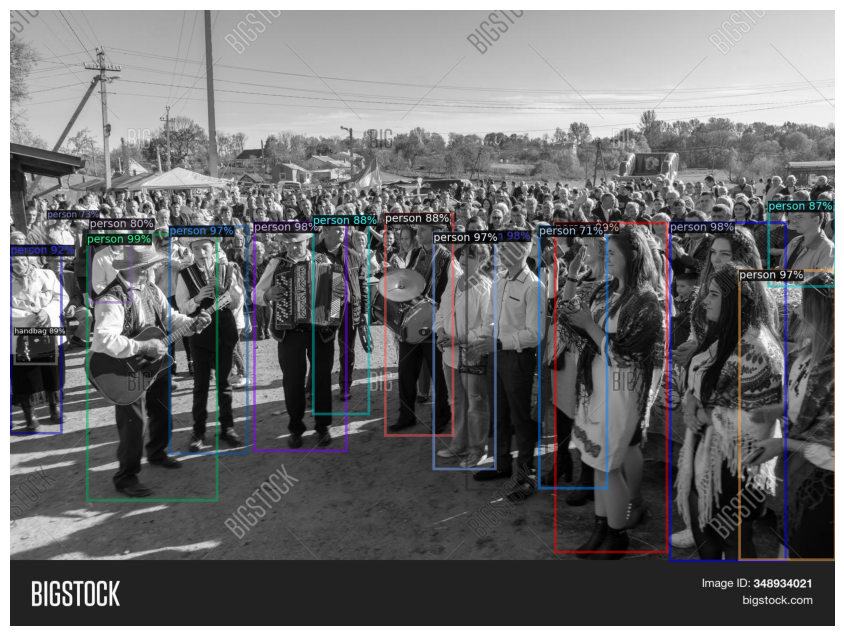

In [ ]:

# Create an instance of the Detector class
detector = Detector()
# Call the onImage method with your image path
detector.onImage("/content/img.jpg")
# detector.onImage("/content/img2.jpg")
# detector.onImage("/content/img3.jpg")

For example, here we download and display a PNG image of the Colab logo: